<a href="https://colab.research.google.com/github/Supun004/MLRevisit/blob/main/Timeseries/Timeseries_SMA_EMA_EWMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pandas_datareader --upgrade

In [ ]:
import pandas_datareader as pdr

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [6]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
2017-03-06,50.340000,49.501999,49.582001,50.242001,16777500.0,50.242001
2017-03-07,50.778000,49.664001,50.383999,49.717999,17297500.0,49.717999
2017-03-08,50.014000,49.063999,49.400002,49.374001,18626000.0,49.374001


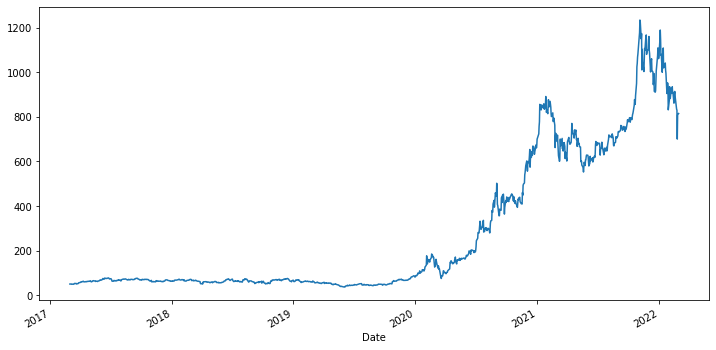

In [9]:
df_tesla['Open'].plot(figsize=(12,6))

In [20]:
 ## Simple moving avarage
 df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10, min_periods=1).mean()
 df_tesla['Open: 20 days rolling'] = df_tesla['Open'].rolling(window=20, min_periods=1).mean()
 df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30, min_periods=1).mean()

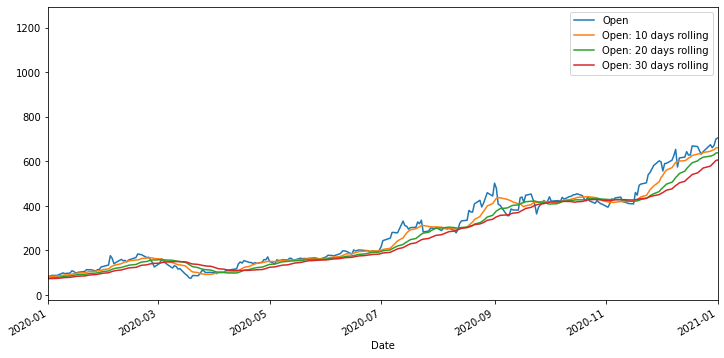

In [21]:
df_tesla[['Open', 'Open: 10 days rolling','Open: 20 days rolling','Open: 30 days rolling' ]].plot(figsize=(12,6), xlim=['2020-01-01', '2021-01-01'])

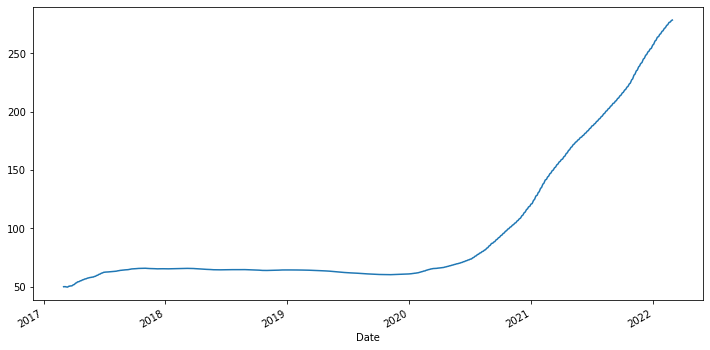

In [23]:
## Expanding => Cumalative moving average (CMA)

df_tesla['Open'].expanding().mean().plot(figsize=(12,6))

In [24]:
## Exponential moving average (EMA)
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1, adjust=False).mean()

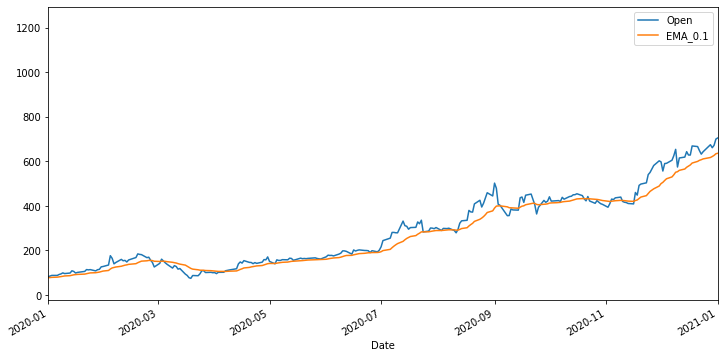

In [25]:
df_tesla[['Open','EMA_0.1']].plot(figsize=(12,6), xlim=['2020-01-01', '2021-01-01'])

In [26]:
## Exponential Weighted Moving Average (EWMA)
df_tesla['EWMA_5days'] = df_tesla['Open'].ewm(span=5).mean()


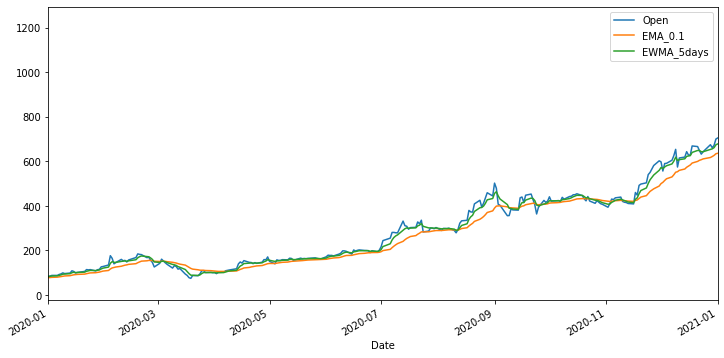

In [28]:
df_tesla[['Open','EMA_0.1','EWMA_5days']].plot(figsize=(12,6), xlim=['2020-01-01', '2021-01-01'])